# 5440_HW1 Junyu Sui

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *
import scipy.integrate as si

In [2]:
e = math.e
beta= 1
lam = 0.1
Q = 100

x = np.arange(0, 1, 0.01)
x_2 = np.arange(1, 2, 0.01)
x_total = np.append(x, x_2)

In [3]:
x = np.linspace(0, 1, 100)
x_2 = np.linspace(1, 2, 100)
x_total = np.append(x, x_2)

### Closed Form Example

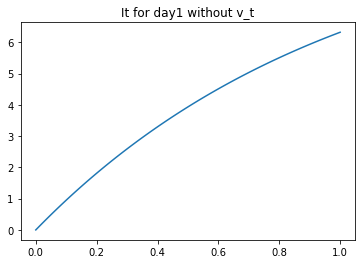

In [4]:
# 1.1.1
I1 = lambda t: (lam * Q / beta) * (1 - np.exp(-beta*t))
It1 = [I1(t) for t in x]

plt.title("It for day1 without v_t")
plt.plot(x, It1)
plt.show()

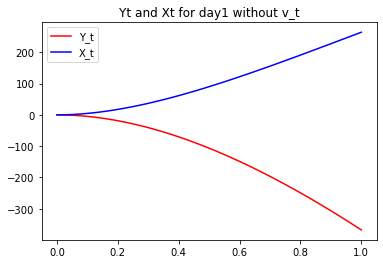

In [5]:
# 1.1.2
Y1 = lambda t: (lam * Q**2 / beta) * (1/beta - t - np.exp(-beta*t)/beta)
Yt1 = [Y1(t) for t in x]
X1 = lambda t: (lam * Q**2 / beta) * (1/beta - np.exp(-beta*t)*t - np.exp(-beta*t)/beta)
Xt1 = [X1(t) for t in x]

plt.title("Yt and Xt for day1 without v_t")
plt.plot(x,Yt1,color = 'r',label = 'Y_t')
plt.plot(x,Xt1,color = 'b', label = 'X_t')
plt.legend()
plt.show()

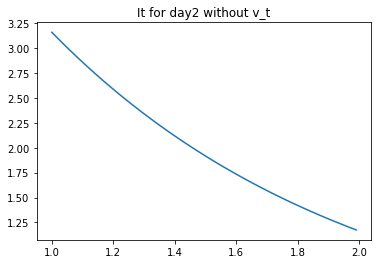

In [6]:
# 1.1.3 day2
x_2 = np.arange(1, 2, 0.01)

I2 = lambda t: lam * Q * (np.exp(-beta*t+beta)-np.exp(-beta*t)) / (2*beta)
It2 = [I2(t) for t in x_2]

plt.title("It for day2 without v_t")
plt.plot(x_2, It2)
plt.show()

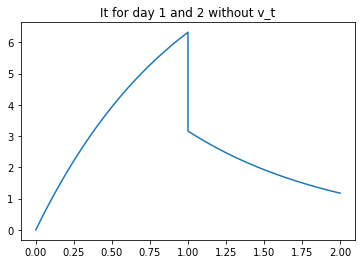

In [7]:
# Combine It1 and It2
It_total = np.append(It1,It2)
plt.title("It for day 1 and 2 without v_t")
plt.plot(x_total, It_total)
plt.show()

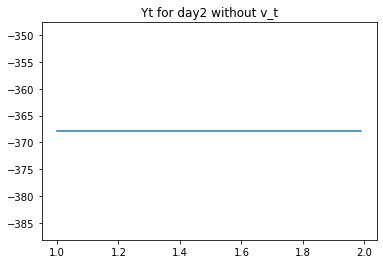

In [8]:
Yt2 = [0] * len(x_2)
Yt2 = Yt2 + Yt1[-1]

plt.title("Yt for day2 without v_t")
plt.plot(x_2, Yt2)
plt.show()

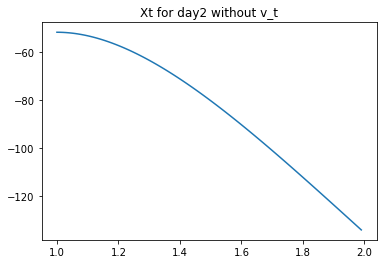

In [9]:
X2 = lambda t: lam * Q**2 * t * (np.exp(-beta*t+beta)-np.exp(-beta*t)) / (2*beta) +Yt2[-1]
Xt2 = [X2(t) for t in x_2]

plt.title("Xt for day2 without v_t")
plt.plot(x_2, Xt2)
plt.show()

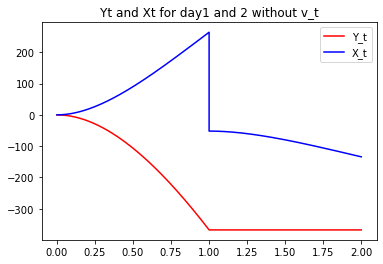

In [10]:
#combine
Yt_total = np.append(Yt1,Yt2)
Xt_total = np.append(Xt1,Xt2)

plt.title("Yt and Xt for day1 and 2 without v_t")
plt.plot(x_total,Yt_total,color = 'r',label = 'Y_t')
plt.plot(x_total,Xt_total,color = 'b', label = 'X_t')
plt.legend()
plt.show()

### Numerical Example

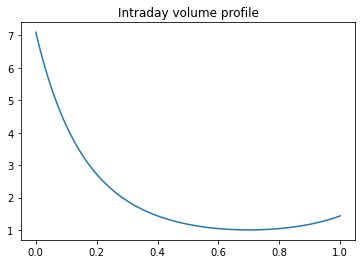

In [11]:
# 1.2.1
e = math.e

v = lambda t: np.exp(4*(t-0.7)**2)
vt = [v(t) for t in x]

plt.title("Intraday volume profile")
plt.plot(x, vt)
plt.show()


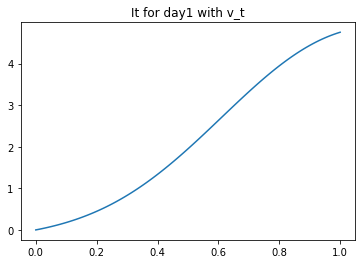

In [12]:
# 1.2.2
#It for day1 with vt
f1 = lambda s: lam * Q * e**(beta * s - 4 * (s-0.7)**2) 
Iv = lambda t: si.quad(f1,0,t)[0] * e**(-beta *t)

#si.quad(f,0,t)[0]
#I_list = [lam * Q * si.quad(f,0,t)[0] for t in x]
Iv_list1 = [Iv(t) for t in x]

plt.title("It for day1 with v_t")
plt.plot(x, Iv_list1)
plt.show()

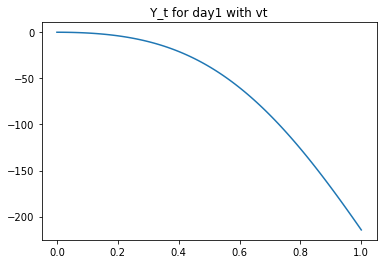

In [13]:
#Yt for day1 with vt
f1 = lambda s: lam * Q * e**(beta * s - 4 * (s-0.7)**2) 
Yv1 = lambda t: -Q * si.quad(f1,0,t)[0] * e**(-beta *t)

Y_list1 = [si.quad(Yv1,0,t)[0] for t in x]

plt.title("Y_t for day1 with vt")
plt.plot(x, Y_list1)
plt.show()

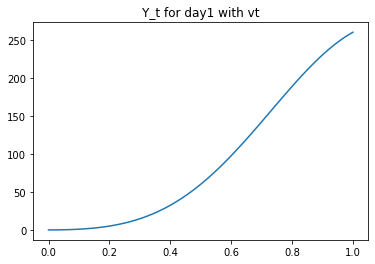

In [14]:
#Xt for day1 with vt
f1 = lambda s: lam * Q * e**(beta * s - 4 * (s-0.7)**2) 
Yv1 = lambda t: -Q * si.quad(f1,0,t)[0] * e**(-beta *t)
Xv1 = lambda t: si.quad(Yv1,0,t)[0] + Q*t*si.quad(f1,0,t)[0]*e**(-beta*t)

X_list1 = [Xv1(t) for t in x]

plt.title("Y_t for day1 with vt")
plt.plot(x, X_list1)
plt.show()

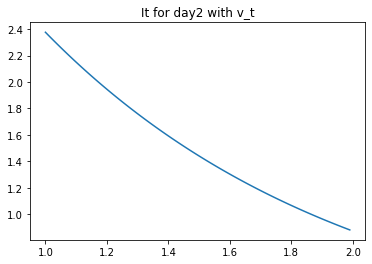

In [16]:
# 1.2.2
#It for day2 with vt
Iv2 = lambda t: Iv_list1[-1]/2 * np.exp(-beta*t + beta)

Iv_list2 = [Iv2(t) for t in x_2]

plt.title("It for day2 with v_t")
plt.plot(x_2, Iv_list2)
plt.show()

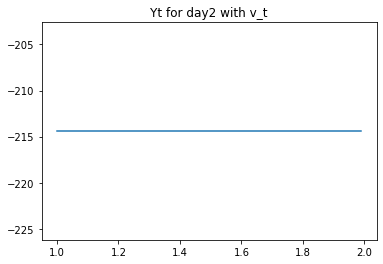

In [18]:
#Yt for day2 with vt
Y_list2 = [Y_list1[-1]] * len(x_2)

plt.title("Yt for day2 with v_t")
plt.plot(x_2, Y_list2)
plt.show()

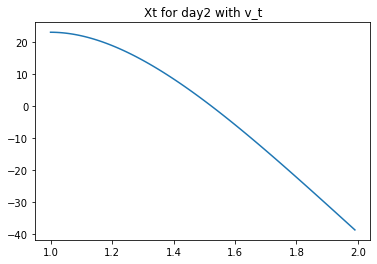

In [19]:
#Xt for day2 with vt
X_list2 = []
for i in np.arange(len(x_2)):
    X_list2.append(Iv_list2[i] * Q * x_2[i] + Y_list2[i])
plt.title("Xt for day2 with v_t")
plt.plot(x_2, X_list2)
plt.show()

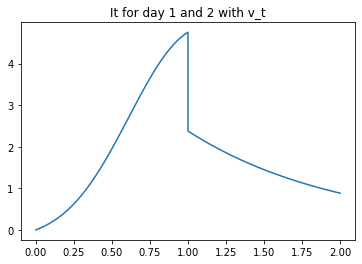

In [20]:
Itv_total = np.append(Iv_list1,Iv_list2)
plt.title("It for day 1 and 2 with v_t")
plt.plot(x_total, Itv_total)
plt.show()

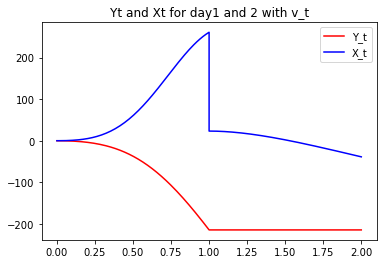

In [21]:
Ytv_total = np.append(Y_list1,Y_list2)
Xtv_total = np.append(X_list1,X_list2)

plt.title("Yt and Xt for day1 and 2 with v_t")
plt.plot(x_total,Ytv_total,color = 'r',label = 'Y_t')
plt.plot(x_total,Xtv_total,color = 'b', label = 'X_t')
plt.legend()
plt.show()